<a href="https://colab.research.google.com/github/jellybeanJoo/PyTorchZeroToAll/blob/main/lec1totheend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


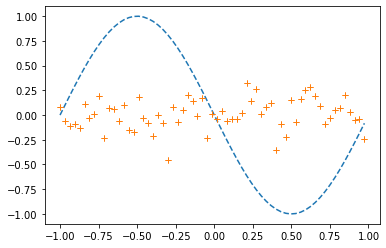

epoch:0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


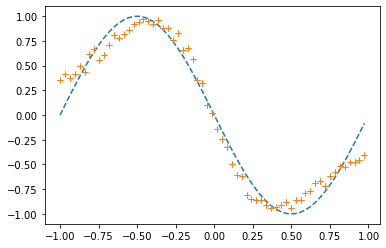

epoch:200


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


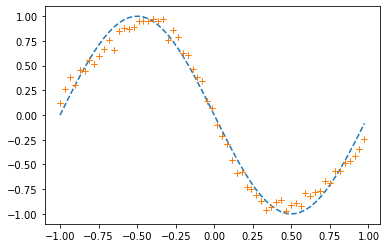

epoch:400


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


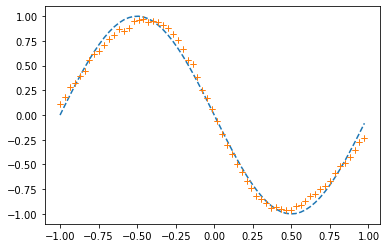

epoch:600


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


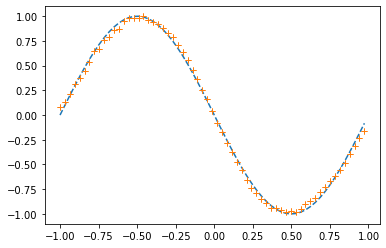

epoch:800


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


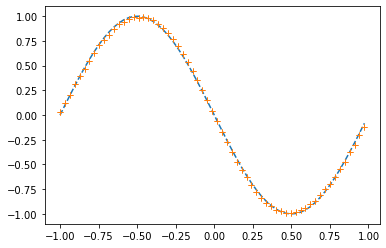

epoch:1000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


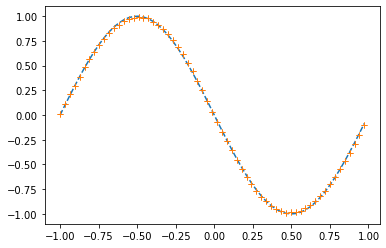

epoch:1200


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


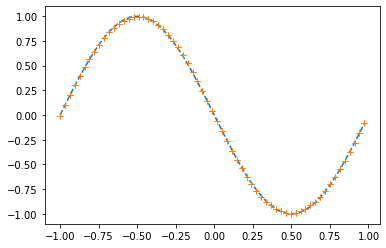

epoch:1400


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


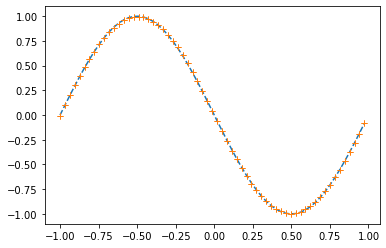

epoch:1600


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


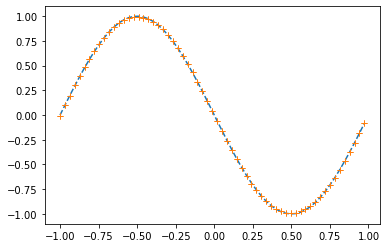

epoch:1800


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


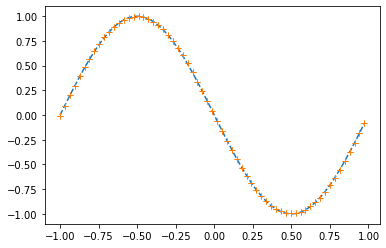

epoch:2000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
input_data = np.arange(0,np.pi*2,0.1)
correct_data = np.sin(input_data)
input_data = (input_data-np.pi)/np.pi
n_data = len(correct_data)

n_in = 1
n_mid = 3
n_out = 1

wb_width = 0.01
eta = 0.1
epoch = 2001
interval = 200

class MiddleLayer:
  def __init__(self,n_upper,n):
    self.w = wb_width*np.random.randn(n_upper,n)
    self.b = wb_width*np.random.randn(n)
  
  def forward(self,x):
    self.x = x
    u = np.dot(x,self.w)+self.b
    self.y = 1/(1+np.exp(-u))
  
  def backward(self,grad_y):
    delta = grad_y*self.y*(1-self.y)
    self.grad_w = np.dot(self.x.T,delta)
    self.grad_b = np.sum(delta,axis=0)
    self.grad_x = np.dot(delta,self.w.T)
  
  def update(self,eta):
    self.w += -eta*self.grad_w
    self.b += -eta*self.grad_b
  
class OutputLayer:
  def __init__(self,n_upper,n):
    self.w = wb_width*np.random.randn(n_upper,n)
    self.b = wb_width*np.random.randn(n)
  
  def forward(self,x):
    self.x = x
    u = np.dot(x,self.w)+self.b
    self.y = u
  
  def backward(self,t):
    delta = self.y - t
    self.grad_w = np.dot(self.x.T,delta)
    self.grad_b = np.sum(delta,axis=0)
    self.grad_x = np.dot(delta, self.w.T)

  def update(self,eta):
    self.w += -eta*self.grad_w
    self.b += -eta*self.grad_b

middle = MiddleLayer(n_in,n_mid)
out = OutputLayer(n_mid,n_out)

for i in range(epoch):

  show_x = []
  show_y = []
  index_random = np.arange(n_data)
  np.random.shuffle(index_random)

  for idx in index_random:
    inn = input_data[idx]
    crr = correct_data[idx]

    middle.forward(inn.reshape(1,1))
    out.forward(middle.y)
    out.backward(crr.reshape(1,1))
    middle.backward(out.grad_x)
    out.update(eta)
    middle.update(eta)

    show_x.append(inn)
    show_y.append(out.y)

    if i%interval==0:
      y=out.y.reshape(-1)
      show_x.append(inn)
      show_y.append(y)

  if i%interval ==0:
    plt.plot(input_data,correct_data, linestyle='dashed')
    plt.plot(show_x, show_y, marker='+',linestyle='none')
    plt.show()
    print("epoch:"+str(i))
    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3])
y1=np.array([3,5,7])
interval = 200

class onlylayer:
  def __init__(self):
    self.w = np.random.randn(1,1)
    self.b = np.random.randn(1)

  def forward(self,x):
    self.x = x
    u=np.dot(x,self.w)+self.b
    self.y = u
  
  def backward(self,t):
    delta = self.y-t
    self.grad_w = np.dot(self.x.T,delta)
    self.grad_b = np.sum(delta,axis=0)

  def update(self):
    self.w -= 0.1*self.grad_w
    self.b -= 0.1*self.grad_b

layer = onlylayer()

for n in range(2000):
  total_error = 0
  plot_x = []
  plot_y = []
  
  for i in x:
    t=2*i+1
    layer.forward(i.reshape(1,1))
    layer.backward(t)
    layer.update()
    total_error += np.sum(np.square(y-t))
    k=np.array([4])
    layer.forward(k.reshape(1,1))
    print(layer.y.reshape(-1))   
    print(total_error)



In [ ]:
import torch

w=torch.tensor([1.0],requires_grad=True)
x_val=[1.0,2.0,3.0]
y_val=[2.0,4.0,6.0]

def forward(x):
  return w*x

def loss(x,y):
  y_pred=forward(x)
  return (y_pred-y)**2

for epoch in range(50):

  for x,y in zip(x_val,y_val):
    l=loss(x,y)
    l.backward()
    w.data=w.data-0.01*w.grad.item()

    w.grad.data.zero_()
  print(w.data,forward(4).item())



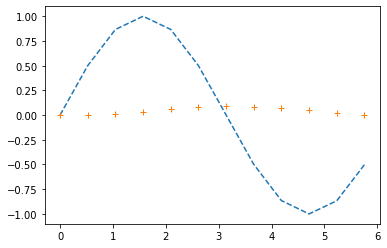

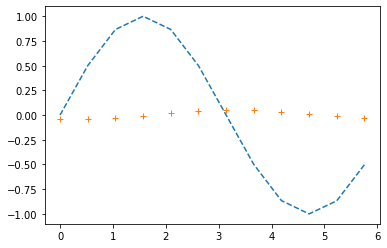

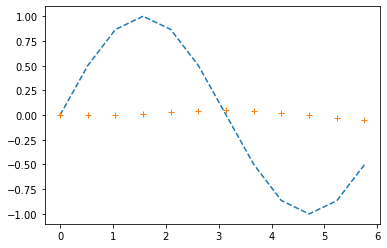

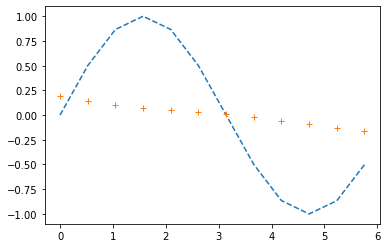

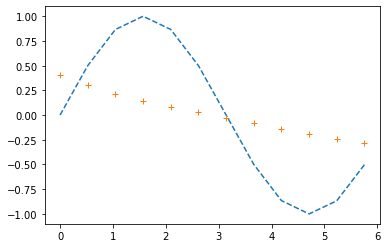

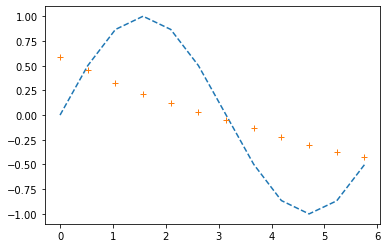

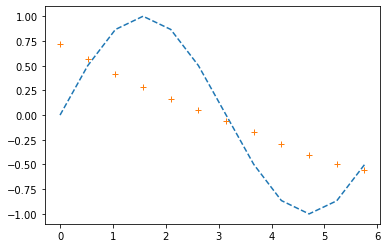

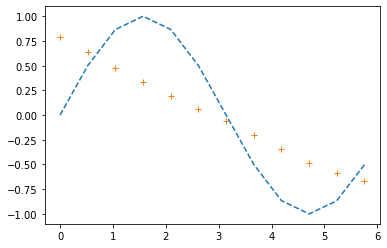

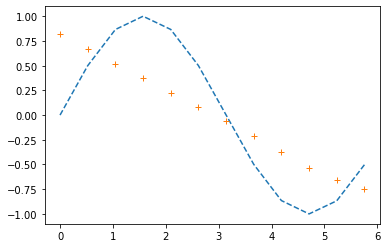

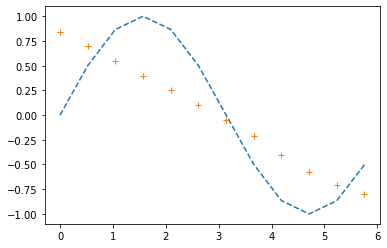

In [ ]:
#완전망했네 ㅎㅎ.....
import torch
import numpy as np
import matplotlib.pyplot as plt

x_val=[3.14*i/6 for i in range(12)]
y_val=[np.sin(3.14*i/6).item() for i in range(12)]
w1=torch.tensor(np.zeros(1),requires_grad=True)
b1=torch.tensor(np.zeros(1),requires_grad=True)
w2=torch.tensor(np.zeros(1),requires_grad=True)
b2=torch.tensor(np.zeros(1),requires_grad=True)

def forward1(x):
  return torch.sigmoid(w1*x+b1)

def forward2(x):
  return w2*x+b2

def loss(x,t):
  a=forward1(x)
  b=forward2(a)
  return (b-t)**2

for epoch in range(400):
  plot_y = []
  total_error=0
  for i in range(len(x_val)):
    a=forward1(x_val[i])
    b=forward2(a)
    l=loss(x_val[i],y_val[i])
    l.backward()
    w2.data = w2.data - 0.01*w2.grad.item()
    b2.data = b2.data - 0.01*b2.grad.item()
    w1.data = w1.data - 0.01*w1.grad.item()
    b1.data = b1.data - 0.01*b1.grad.item()

    w2.grad.data.zero_()
    b2.grad.data.zero_()
    w1.grad.data.zero_()
    b1.grad.data.zero_()

    if epoch%40==0:
      plot_y.append(b.item())
      total_error += l.item()
  if epoch%40==0:
    plt.plot(x_val,y_val,linestyle="dashed")
    plt.plot(x_val,plot_y,linestyle="none",marker="+")
    plt.show()


# import torch
# import numpy as np
# import matplotlib.pyplot as plt

# w1 = torch.tensor(np.zeros(3),requires_grad=True)
# b1 = torch.tensor(np.zeros(3),requires_grad=True)
# w2 = torch.tensor(np.zeros(1),requires_grad=True)
# b2 = torch.tensor(np.zeros(1),requires_grad=True)
# x=np.arange(0,2*np.pi,0.1)
# correct_data = np.sin(x)

# def forward1(x):
#   u=np.dot(x,w1)+b1
#   return 1/1+np.exp(-u)

# def forward2(x):
#   u2=np.dot(x,w2)+b2
#   return u2

# def loss(x,t):
#   y_pred = forward2(np.array(forward1(x)))
#   return (y_pred - t)**2

# for epoch in range(100):
#   index_random = np.arange(len(x))
#   np.random.shuffle(index_random)
#   plot_x =[]
#   plot_y = []

#   for idx in index_random:
#     x1=np.array(x[idx])
#     c1=np.array(correct_data[idx])
#     a=forward1(x1)
#     b=forward2(a)
#     l=loss(b,c1.reshape(1,1))
#     l.backward()
#     w2.data = w2.data - 0.01*w2.grad.item()
#     b2.data = b2.data - 0.01*b2.grad.item()
#     w1.data = w1.data - 0.01*w1.grad.item()
#     b1.data = b1.data - 0.01*b1.grad.item()

#     if epoch%10==0:
#       plot_x.append(x[idx])
#       plot_y.append(b.reshape(-1))

#   if epoch%10 ==0:
#     plt.plot(plot_x,plot_y,linestyle='none',marker='+')
#     plt.plot(x,correct_data,linestyle='dashed')
#     plt.show()
    
  

In [ ]:
import torch
import numpy as np

xy = np.loadtxt('/content/diabetes.csv',delimiter=',',dtype=np.float32)
x_data = torch.from_numpy(xy[:,0:-1])
y_data = torch.from_numpy(xy[:,[-1]])
x1 = x_data[0]
x1 = torch.reshape(x1,(1,8))
y1 = y_data[0]
y1 = torch.reshape(y1,(1,1))

class model(torch.nn.Module):
  def __init__(self):
    super(model,self).__init__()
    self.l1 = torch.nn.Linear(8,6)
    self.l2 = torch.nn.Linear(6,4)
    self.l3 = torch.nn.Linear(4,1)
  
  def forward(self,x):
    out1 = torch.sigmoid(self.l1(x))
    out2 = torch.sigmoid(self.l2(out1))
    y_pred = torch.sigmoid(self.l3(out2))
    return y_pred

mo = model()
criterion = torch.nn.BCELoss(reduction = 'mean')
optimizer = torch.optim.Adam(mo.parameters(),lr=0.1)

for epoch in range(200):
  y_pred = mo(x_data)
  loss = criterion(y_pred,y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%20==0:
    print(epoch,loss.item(),mo(x1).item(),y1.item())



0 0.6961140632629395 0.5938809514045715 0.0
20 0.6024923920631409 0.6225870251655579 0.0
40 0.47672417759895325 0.2827497720718384 0.0
60 0.4548744857311249 0.28630879521369934 0.0
80 0.4385247230529785 0.22596636414527893 0.0
100 0.4277733266353607 0.17130407691001892 0.0
120 0.41975292563438416 0.13634172081947327 0.0
140 0.4129921793937683 0.1145387813448906 0.0
160 0.4041332006454468 0.09837054461240768 0.0
180 0.39674943685531616 0.10166510939598083 0.0


In [ ]:
import torch
from torch.utils.data import Dataset,DataLoader

class data(Dataset):
  def __init__(self):
    xy = np.loadtxt('/content/diabetes.csv',delimiter=',',dtype=np.float32)
    self.x = torch.from_numpy(xy[:,0:-1])
    self.y = torch.from_numpy(xy[:,[-1]])
    self.len = xy.shape[0]

  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]

  def __len__(self):
    return self.len

class model(torch.nn.Module):
  def __init__(self):
    super(model,self).__init__()
    self.l1 = torch.nn.Linear(8,6)
    self.l2 = torch.nn.Linear(6,4)
    self.l3 = torch.nn.Linear(4,1)
  
  def forward(self,x):
    out1 = torch.sigmoid(self.l1(x))
    out2 = torch.sigmoid(self.l2(out1))
    y_pred = torch.sigmoid(self.l3(out2))
    return y_pred

ddd = data()
train_loader = DataLoader(dataset = ddd,batch_size = 32, shuffle=True)
x1 = ddd.x[0]
x1 = torch.reshape(x1,[1,8])
y1 = ddd.y[0]
y1 = torch.reshape(y1,[1,1])

mo = model()
criterion = torch.nn.BCELoss(reduction = 'mean')
optimizer = torch.optim.Adam(mo.parameters(),lr=0.01)

for epoch in range(1000):
  for i,d in enumerate(train_loader):
    input,label = d
    input, label = torch.tensor(input), torch.tensor(label)
    y_pred = mo(input)
    loss = criterion(y_pred,label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  if epoch%20==0:
    print(epoch,loss.item(),y1.item(),mo(x1).item())
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0 0.6960159540176392 0.0 0.6440910696983337
20 0.44911858439445496 0.0 0.32965773344039917
40 0.5448157787322998 0.0 0.30187782645225525
60 0.2942693829536438 0.0 0.30323678255081177
80 0.37283989787101746 0.0 0.2917121946811676
100 0.2822200357913971 0.0 0.24670745432376862
120 0.5786032676696777 0.0 0.24793465435504913
140 0.43731042742729187 0.0 0.195143461227417
160 0.5947813987731934 0.0 0.21170461177825928
180 0.5785693526268005 0.0 0.19384296238422394
200 0.5601086616516113 0.0 0.19947262108325958
220 0.39520201086997986 0.0 0.18072372674942017
240 0.5002335906028748 0.0 0.18171072006225586
260 0.2958497405052185 0.0 0.15740568935871124
280 0.3204699456691742 0.0 0.16587476432323456
300 0.28654757142066956 0.0 0.16743969917297363
320 0.31719428300857544 0.0 0.15224890410900116
340 0.41889700293540955 0.0 0.15971095860004425
360 0.4050886332988739 0.0 0.14930225908756256
380 0.6035456657409668 0.0 0.15809479355812073
400 0.33896109461784363 0.0 0.15496298670768738
420 0.290479898

In [ ]:
import torch
import numpy as np
xy=np.loadtxt('/content/diabetes.csv',delimiter=',',dtype=np.float32)
y = torch.from_numpy(xy[:,[-1]])
x= torch.from_numpy(xy[:,0:-1])
x1 = x[0]
x1 = torch.reshape(x1,(1,8))
a=torch.tensor([[2]])
print(x1.shape)

torch.Size([1, 8])


In [ ]:
!cd /content

In [ ]:
file_id="1DBPlbJsJtCNpQFIEI9z71K2H661WdjzO"
!gdown https://drive.google.com/uc?id={file_id}

Downloading...
From: https://drive.google.com/uc?id=1DBPlbJsJtCNpQFIEI9z71K2H661WdjzO
To: /content/diabetes.csv
100% 53.4k/53.4k [00:00<00:00, 19.8MB/s]


In [ ]:
import torch

loss = torch.nn.CrossEntropyLoss()
y = torch.tensor([0])
y1 = torch.tensor([[2.0,1.0,0.1]])
y2 = torch.tensor([[0.5,2.0,0.3]])
l1=loss(y1,y)
l2 = loss(y2,y)
print(l1.data.item())
print(l2.data.item())
print(y)

In [ ]:
from torchvision import datasets,transforms

dd = datasets.MNIST(root='/content',download = True, train=True, transform=transforms.ToTensor())
print(dd)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw




Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw

Processing...
Done!
Dataset MNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train
    StandardTransform
Transform: ToTensor()


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
from torchvision import datasets,transforms
import torch
import time


train_dataset = datasets.MNIST(train=True, download = False, root = '/content',transform = transforms.ToTensor())
test_dataset = datasets.MNIST(train=False,transform=transforms.ToTensor(),root='/content')
train_loader = torch.utils.data.DataLoader(batch_size=64,shuffle=True,dataset=train_dataset)
test_loader = torch.utils.data.DataLoader(batch_size=64,shuffle=False,dataset=test_dataset)


class modell(torch.nn.Module):
  def __init__(self):
    super(modell,self).__init__()
    self.l1 = torch.nn.Linear(784,520)
    self.l2 = torch.nn.Linear(520,320)
    self.l3 = torch.nn.Linear(320,240)
    self.l4 = torch.nn.Linear(240,120)
    self.l5 = torch.nn.Linear(120,10)

  def forward(self,x):
    x = x.view(-1,784)
    x=torch.relu(self.l1(x))
    x=torch.relu(self.l2(x))
    x=torch.relu(self.l3(x))
    x=torch.relu(self.l4(x))
    return self.l5(x)

mo=modell()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mo.parameters(),lr=0.01)

def train(epoch):
  mo.train()
  for batch_going,(data,label) in enumerate(train_loader):
    y_pred = mo(data)
    loss = criterion(y_pred,label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch_going%10==0:
      print(epoch,batch_going,len(train_loader.dataset),loss.item())

def test():
  mo.eval()
  test_loss=0
  correct=0
  for data,label in test_loader:
    y_pred = mo(data)
    test_loss += criterion(y_pred,label).item()
    pred = y_pred.data.max(1,keepdim=True)[1]
    correct += pred.eq(label.data.view_as(pred)).sum()   
  test_loss /= len(test_loader.dataset)
  print(f'average loss:{test_loss},accuracy:{correct/len(test_loader.dataset)}')

if __name__=='__main__':
  for epoch in range(1,10):
    epoch_start=time.time()
    train(epoch)
    m,s=divmod(time.time()-epoch_start,60)
    print(f'training time:{m}:{s}')
    test()





1 0 60000 2.3068385124206543
1 10 60000 1.5762717723846436
1 20 60000 1.2237619161605835
1 30 60000 0.6845386028289795
1 40 60000 0.7406759858131409
1 50 60000 0.5955078601837158
1 60 60000 0.5911571979522705
1 70 60000 0.38715440034866333
1 80 60000 0.31280940771102905
1 90 60000 0.49513664841651917
1 100 60000 0.3600573241710663
1 110 60000 0.21842651069164276
1 120 60000 0.35109007358551025
1 130 60000 0.20972171425819397
1 140 60000 0.6076868176460266
1 150 60000 0.2874281108379364
1 160 60000 0.18657884001731873
1 170 60000 0.47489652037620544
1 180 60000 0.12736134231090546
1 190 60000 0.24676403403282166
1 200 60000 0.4763680100440979
1 210 60000 0.21108561754226685
1 220 60000 0.6984266042709351
1 230 60000 0.7453212141990662
1 240 60000 0.13397525250911713
1 250 60000 0.1886664628982544
1 260 60000 0.2214588224887848
1 270 60000 0.46753817796707153
1 280 60000 0.49131107330322266
1 290 60000 0.37503430247306824
1 300 60000 0.41648441553115845
1 310 60000 0.19263890385627747
1 

In [ ]:
import torch

loss = torch.nn.CrossEntropyLoss()
y=torch.tensor([0])
y_pred1 = torch.tensor([[2.0,1.0,0.1]])
l1 = loss(y_pred1,y)
print(l1.item())
print(y_pred1.data.max(1,keepdim=True)[0].item())
print(y_pred1.data.max(1,keepdim=True)[1].item())

0.4170299470424652
2.0
0


In [ ]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import transforms,datasets

train_data = datasets.MNIST(train=True,root='/content',download=False,transform=transforms.ToTensor())
test_data = datasets.MNIST(train=False,root='/content',download=False,transform=transforms.ToTensor())
train_loader = DataLoader(batch_size=64,shuffle=True,dataset=train_data)
test_data = DataLoader(batch_size=64,shuffle=False,dataset=test_data)

class Net(torch.nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = torch.nn.Conv2d(1,10,kernel_size=5)
    self.conv2 = torch.nn.Conv2d(10,20,kernel_size=5)
    self.mp = torch.nn.MaxPool2d(2)
    self.fc = torch.nn.Linear(320,10)

  def forward(self,x):
    i=x.size(0)
    x=torch.relu(self.mp(self.conv1(x)))
    x=torch.relu(self.mp(self.conv2(x)))
    x=x.view(i,-1)
    x=self.fc(x)
    return F.log_softmax(x,dim=1)

mo=Net()
optimizer = torch.optim.Adam(mo.parameters(),lr=0.01)

def train(epoch):
  mo.train()
  print(len(train_loader.dataset))
  for i,(input,answer) in enumerate(train_loader):
    y_pred = mo(input)
    loss = F.nll_loss(y_pred,answer)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%10==0:
      print(epoch,i,loss.item())  

def test():
  mo.eval()
  correct = 0
  total_loss =0
  for input,answer in test_loader:
    y_pred = mo(input)   
    total_loss += F.nll_loss(y_pred,answer).item()
    pred = y_pred.data.max(1,keepdim=True)[1]
    correct += pred.eq(answer.data.view_as(pred)).sum()
  total_loss /= len(test_loader.dataset)
  print(correct.item()/len(test_loader.dataset),total_loss)


for epoch in range(1):
  train(epoch)
  test()









In [ ]:
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from torch import nn

train_dataset = datasets.MNIST(root='/content',download=False,train=True)
test_dataset = datsets.MNIST(root='/content',train=False,download=False)
train_loader = DataLoader(batch_size=64,shuffle=True,dataset=train_dataset)
test_loader = DataLoader(batch_size=64,shuffle=True,dataset=test_dataset)

class inceptionA(torch.nn.Module):
  def __init__(self,in_channels):
    super(inceptionA,self).__init__()
    self.branch1x1 = nn.Conv2d(in_channels,16,kernel_size=1)

    self.branch5x5_1 = nn.Conv2d(in_channels,16,kernel_size=1)
    self.branch5x5_2 = nn.Conv2d(16,24,kernel_size=5,padding=2)

    self.branch3x3_1 = nn.Conv2d(in_channels,16,kernel_size=1)
    self.branch3x3_2 = nn.Conv2d(16,24,kernel_size=3,padding=1)
    self.branch3x3_3 = nn.Conv2d(24,24,kernel_size=3,padding=1)

    self.branch_pool = nn.Conv2d(in_channels,24,kernel_size=1)
  
  def forward(self,x):
    branch1x1 = 

class Net(torch.nn.Module):
  def __init__(self):
    super(Net,self).__init__()

  def forward(self,x):


mo=Net()

def train(epoch):
  mo.train()

def test():
  mo.eval()

for epoch in range(5):
  train(epoch)
  test()


In [ ]:
from torch import nn
import torch
import torch.nn.functional as F

class InceptionA(nn.Module):

    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size=1)

        self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3dbl_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = nn.Conv2d(24, 24, kernel_size=3, padding=1)

        self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size=1)

    def forward(self, x):
        self.branch1x11 = self.branch1x1(x)

        self.branch5x51 = self.branch5x5_1(x)
        self.branch5x52 = self.branch5x5_2(self.branch5x51)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        self.branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        self.branch_pool1 = self.branch_pool(branch_pool)

        outputs = [self.branch1x11, self.branch5x52, self.branch3x3dbl, self.branch_pool1]
        self.ans=torch.cat(outputs, 1)
        return self.ans

class Net(torch.nn.Module):
  def __init__:
    super(Net,self).__init__()
    self.conv1 = torch.nn.Con2d(1,10,kernel_size=5)



In [ ]:
# class Fourcal:
#   def __init__(self,first,second):
#     self.f=1
#     self.s=2

# b=Fourcal(4,2)
# print(b.f,b.s)

class what:
  e=3
  def setdata(self,num):
    self.a=1
    self.b=2
    self.c=num

d=what()
d.setdata(6)
print(d.a)

1


In [ ]:
import torch
x=torch.rand([2,5],requires_grad=True)
layer = torch.nn.Linear(5,10)
list(layer)